In [1]:
from PIL import Image
import requests
import torch
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
#vid = cv2.VideoCapture(0)
import datetime

#initialize model and feature extractor
model=torch.load('hustvl_yolo_model.pth')
feature_extractor=torch.load('hustvl_yolo_extractor.pth')
#vid = cv2.VideoCapture(0)

def take_picture():
    vid = cv2.VideoCapture(0)
    ret, image = vid.read()
    vid.release()
    return image

def load_image_from_file(filename):
    return mpimg.imread(filename)

def detect_objects(image):
    image_np=np.array(image)
    fig, ax = plt.subplots()
    objects=dict()
    inputs = feature_extractor(images=image, return_tensors="pt")
    outputs = model(**inputs)

    # model predicts bounding boxes and corresponding COCO classes
    logits = outputs.logits
    bboxes = outputs.pred_boxes
    score=torch.nn.functional.softmax(logits,dim=2)
    predictions=torch.argmax(score, dim=2)

    for n,i in enumerate(predictions[0]):
        if i!=91 and max(score[0,int(n)]) >=0.9 and i in [1,17,18]:
        #if i!=91 and max(score[0,int(n)]) >=0.9:
            print(str(model.config.id2label[int(i)])+" detected in image")
            try:
                objects[str(model.config.id2label[int(i)])]+=1
            except:
                objects[str(model.config.id2label[int(i)])]=1
            a,b,c,d=bboxes[0,n].detach().numpy()
            height=image_np.shape[0]
            width=image_np.shape[1]
            x,y,w,h=a-c/2,b-d/2,c,d
            x,y,w,h=x*width,y*height,w*width,h*height
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
    
    ax.imshow(image)
    filename=str(datetime.datetime.now().strftime('%Y-%m-%d-%H-%M'))+'_dogcam.png'
    plt.savefig(filename)
    plt.show()
    return objects

person detected in image


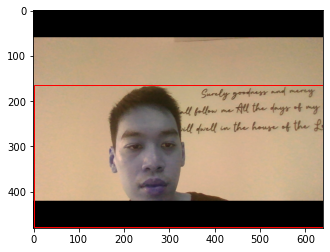

In [2]:
# import numpy as np
# initialize_img = np.zeros([480,640,3] , dtype='uint8')
# cv2.imwrite('test_img.jpg', initialize_img)
# testimage=Image.open('test_img.jpg')
# objects=detect_objects(testimage)
image=take_picture()
objects=detect_objects(image)

dog detected in image
dog detected in image
dog detected in image
dog detected in image


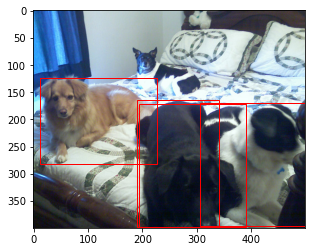

In [2]:
import os
os.chdir('C:\\Users\\seang\\IoT\\Object_Detection_Demo')
image = Image.open('example (1).jpg')
objects=detect_objects(image)

dog detected in image


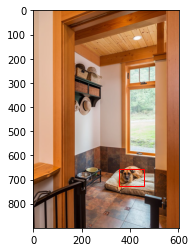

In [3]:
image = Image.open('Entryway-Dog.jpg')
objects=detect_objects(image)

person detected in image
dog detected in image
person detected in image
person detected in image
person detected in image
person detected in image
person detected in image


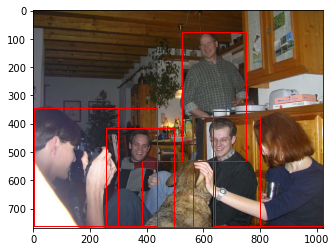

In [4]:
image = Image.open('example-2.jpg')
objects=detect_objects(image)